# Time Series Visualization
1. Line Plots
2. Histograms and Density Plots
3. Box and Whisker Plots
4. Heat Maps
5. Lag Plots or Scatter Plots
6. Autocorrelation Plots

## Line Plot

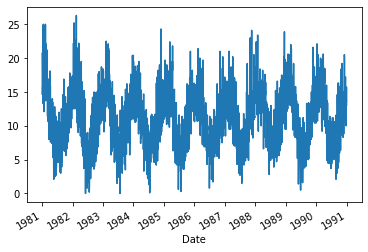

In [1]:
# create a line plot
import matplotlib.pyplot as plt
import pandas as pd

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
                    parse_dates=True, squeeze=True)
series.plot()
plt.show()

We can change the style of the plot in various ways:

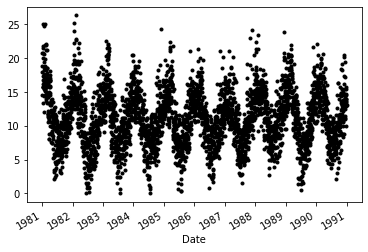

In [2]:
series.plot(style='k.')
plt.show()

Perhaps we want to group our data to compare year by year changes:

Each Year With 1981 at the Top and 1990 at the Bottom


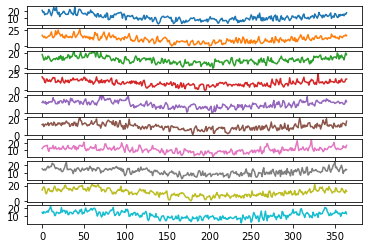

In [3]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
print('Each Year With 1981 at the Top and 1990 at the Bottom')
plt.show()

## Histogram and Density Plots

Histograms can plot our values without temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. normal distribution). This can be explicitly checked using tools like statistical hypothesis tests, but plots can provide a useful first check. 

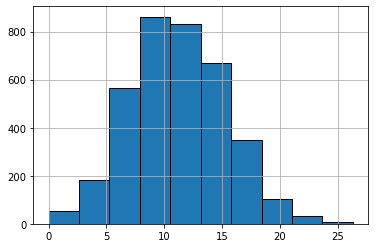

In [4]:
# Histogram plot
series.hist(edgecolor='black')
plt.show()

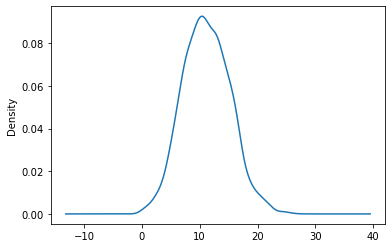

In [5]:
# Density plot
series.plot(kind='kde')
plt.show()

The data is a little asymmetrical and may not be Gaussian. We can run statistical tests to confirm if this is Gaussian enough and perhaps perform techniques to reshape the distribution (like the Box-Cox transform). 

## Box and Whisker Plots by Interval

Box and whisker plots can be compared for each interval in a time series, such as years, months, or days.

In [6]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


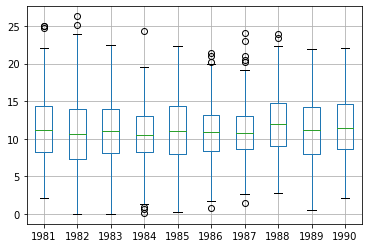

In [7]:
years.boxplot()
plt.show()

We may be interested in the distribution of values across months within a year. The example below creates box and whisker plots, one for each month of 1990, the last year of the dataset.

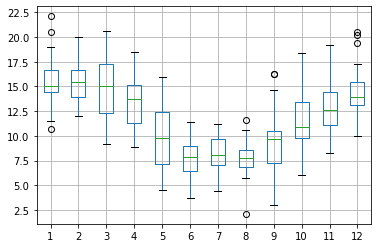

In [10]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show()

In [15]:
months.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,14.8,12.0,19.3,15.3,13.0,9.7,7.4,6.8,6.0,11.3,15.4,13.3
1,13.3,12.2,17.3,14.7,13.9,8.2,7.3,9.8,9.5,10.5,11.8,13.2
2,15.6,14.8,19.0,11.0,12.6,8.4,7.7,5.7,8.6,9.9,13.0,16.2
3,14.5,14.8,19.8,12.2,14.3,8.5,7.7,8.6,7.6,11.0,11.1,17.3
4,14.3,14.4,19.3,14.2,16.0,10.4,9.3,10.6,10.4,14.0,12.5,20.5


## Heat Maps

By arranging obserations into a matrix of year-columns and day-rows (similar to what we did above by arranding into month-columns and day-rows) with values for each day, we create a structure that can be easily plotted into a heat map. 

There is no heatmap support provided directly by pandas, so we can use either Seaborn or Matplotlib to create our visualization. In this example, we will use the `matshow()` function from Matplotlib.

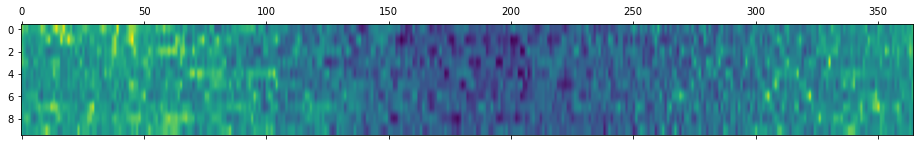

In [19]:
# create a heat map of yearly data
# We transpose the dataframe to create a left-right orientation for time
plt.matshow(years.T, interpolation=None, aspect='auto')
plt.show()

## Lag Scatter Plots

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a `lag_plot()` function for this. It plots the observation at time `t` on the x-axis and observation at the next time step `t+1` (also known as `lag1`) on the y-axis. 
- The shape of the scatterplot can demonstrate the degree of correlation between these points

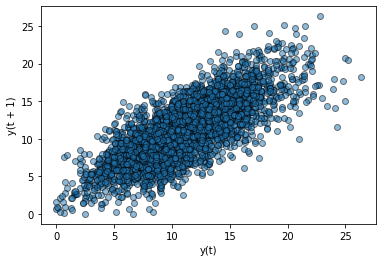

In [23]:
from pandas.plotting import lag_plot
lag_plot(series, alpha = 0.5, edgecolor='black')
plt.show()

The plot created shows a relatively strong positive correlation between observations and their `lag1` values.

We can recreate this process with any lag value:

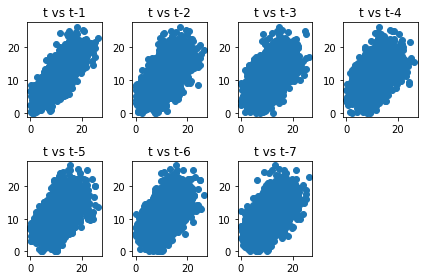

In [33]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
df = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
df.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
plt.tight_layout()
plt.show()

## Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. Pandas has this capability built in with the `autocorrelation_plot()` function.

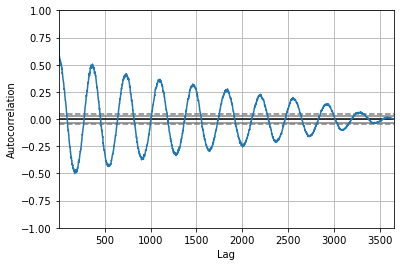

In [40]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

The oscillating nature of the correlation represents inherent seasonality in the data, approximately 1 year in length.